In [1]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 50.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.23
    Uninstalling botocore-1.35.23:
      Successfully uninstalled botocore-1.35.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.15.1 requires botocore<1.35.24,>=1.35.16, but you have botocore 1.29.165 which is incompatible.


In [2]:
from pathlib import Path


import boto3

In [ ]:
access_key_id = "access_key_id"
secret_access_key = "secret_access_key"
pack = "pack4"

In [ ]:
def download_folder(s3_resource, bucket_name, folder_name):
    bucket = s3_resource.Bucket(bucket_name)
    for obj in bucket.objects.filter(Prefix=folder_name):
        directory = Path(obj.key).parent
        if not directory.exists():
            directory.mkdir(parents=True)
        bucket.download_file(obj.key, obj.key)

In [ ]:
resource = boto3.resource(
    "s3",
    endpoint_url="https://storage.yandexcloud.net",
    aws_access_key_id=access_key_id,
    aws_secret_access_key=secret_access_key,
)

In [6]:
download_folder(resource, "waste", pack)

KeyboardInterrupt: 

# Фильтры

In [25]:
import cv2
import numpy as np
import os
from PIL import Image, ImageEnhance

# Пути к директориям
input_dir = '/kaggle/working/pack4/images'
output_dir = '/kaggle/working/pack4/edited_images'

os.makedirs(output_dir, exist_ok=True)

def enhance_debris_visibility(img):
    b, g, r = cv2.split(img)
    b = cv2.multiply(b, 0.2)  
    img = cv2.merge([b, g, r])
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced_gray = clahe.apply(gray)
    
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(enhanced_gray, -1, kernel)
    
    adjusted_img = cv2.convertScaleAbs(sharpened, alpha=1.5, beta=0)

    final_img = cv2.cvtColor(adjusted_img, cv2.COLOR_GRAY2BGR)
    
    return final_img

for filename in os.listdir(input_dir):
    if filename.endswith('.JPG'):
        img_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        # Загрузка изображения
        image = cv2.imread(img_path)
        
        # Применение улучшений
        enhanced_image = enhance_debris_visibility(image)
        
        # Сохранение улучшенного изображения
        cv2.imwrite(output_path, enhanced_image)

print("Обработка изображений завершена.")

KeyboardInterrupt: 

# Разбивка на тренировочную и валидационную выборку

In [23]:
import os
import random
import shutil

images_path = '/kaggle/working/pack4/oversampled_images'
labels_path = '/kaggle/working/pack4/oversampled_labels'

train_images_path = 'pack4/train/images'
val_images_path = 'pack4/val/images'
train_labels_path = 'pack4/train/labels'
val_labels_path = 'pack4/val/labels'

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

val_split = 0.2

all_images = os.listdir(images_path)
random.shuffle(all_images)

val_size = int(len(all_images) * val_split)
val_images = all_images[:val_size]
train_images = all_images[val_size:]

for image_name in train_images:
    label_name = image_name.replace('.JPG', '.txt')  
    if os.path.exists(os.path.join(labels_path, label_name)):
        shutil.copy(os.path.join(images_path, image_name), train_images_path)
        shutil.copy(os.path.join(labels_path, label_name), train_labels_path)

for image_name in val_images:
    label_name = image_name.replace('.JPG', '.txt')
    if os.path.exists(os.path.join(labels_path, label_name)):
        shutil.copy(os.path.join(images_path, image_name), val_images_path)
        shutil.copy(os.path.join(labels_path, label_name), val_labels_path)

print("Данные успешно разбиты на тренировочную и валидационную части.")

Данные успешно разбиты на тренировочную и валидационную части.


# Уменьшение размера изображений

In [44]:
import cv2
import os

input_dir = '/kaggle/working/pack4/edited_images'
output_dir = '/kaggle/working/pack4/resized_images'

os.makedirs(output_dir, exist_ok=True)

scale_factor = 0.5

for filename in os.listdir(input_dir):
    if filename.endswith('.JPG') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        image = cv2.imread(img_path)
        
        if image is None:
            print(f"Не удалось загрузить {img_path}")
            continue
        
        new_width = int(image.shape[1] * scale_factor)
        new_height = int(image.shape[0] * scale_factor)
        resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
        
        cv2.imwrite(output_path, resized_image)

print("Уменьшение размера изображений завершено.")


Уменьшение размера изображений завершено.


## Загрузка yaml

In [13]:
!gdown --id 1a0UcWVQVVN3NVqN2gBdEyVmPVs3CSSUH

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1a0UcWVQVVN3NVqN2gBdEyVmPVs3CSSUH
To: /kaggle/working/data.yaml
100%|███████████████████████████████████████████| 197/197 [00:00<00:00, 913kB/s]


In [14]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


In [15]:
!pip uninstall -y wandb

Found existing installation: wandb 0.18.3
Uninstalling wandb-0.18.3:
  Successfully uninstalled wandb-0.18.3


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# Применение YOLO

In [6]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

In [3]:
!pip uninstall -y wandb

Found existing installation: wandb 0.18.3
Uninstalling wandb-0.18.3:
  Successfully uninstalled wandb-0.18.3


In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 1.6G
-rw-r--r-- 1 root root  80M Nov 19 10:24 yolov10b.pt
-rw-r--r-- 1 root root  80M Nov 19 10:24 yolov10b.pt.1
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.2
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.3
-rw-r--r-- 1 root root 100M Nov 19 10:24 yolov10l.pt
-rw-r--r-- 1 root root 100M Nov 19 10:24 yolov10l.pt.1
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.2
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.3
-rw-r--r-- 1 root root  64M Nov 19 10:24 yolov10m.pt
-rw-r--r-- 1 root root  64M Nov 19 10:24 yolov10m.pt.1
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.2
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.3
-rw-r--r-- 1 root root  11M Nov 19 10:24 yolov10n.pt
-rw-r--r-- 1 root root  11M Nov 19 10:24 yolov10n.pt.1
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.2
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.3
-rw-r--r-- 1 root root  32M Nov 19 10:24 yolov10s.pt
-rw-r--r-- 1 root root  32M Nov 19 10:24 yolov10s.pt.1
-rw-r--r-

In [6]:

!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.2/887.2 kB 14.1 MB/s eta 0:00:00a 0:00:01


In [24]:
%cd {HOME}

!yolo task=detect mode=train epochs=5 batch=32 plots=True \
model={HOME}/weights/yolov10m.pt \
data={HOME}/data.yaml

/kaggle/working
Ultralytics 8.3.33 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/weights/yolov10m.pt, data=/kaggle/working/data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

In [9]:
%cd {HOME}
Image(filename='/kaggle/working/runs/detect/train4/results.png', width=600)

/kaggle/working


TypeError: 'module' object is not callable

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/kaggle/working


TypeError: 'module' object is not callable

In [16]:
import os

labels_dir = '/kaggle/working/pack4/labels'
classes_file = '/kaggle/working/pack4/classes.txt'

with open(classes_file, 'r') as f:
    classes = f.read().strip().split('\n')

class_counts = {class_name: 0 for class_name in classes}

for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            for line in f:
                class_id = int(line.split()[0])  
                class_counts[classes[class_id]] += 1

print("Количество объектов по классам:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Количество объектов по классам:
Waste: 230


# Аугаментация данных

In [17]:
import albumentations as A
from albumentations.core.composition import OneOf
import cv2
import os

augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.GaussNoise(p=0.2)
])

input_images_dir = '/kaggle/working/pack4/resized_images'
input_labels_dir = '/kaggle/working/pack4/labels'

augmented_images_dir = '/kaggle/working/pack4/augmented_images'
augmented_labels_dir = '/kaggle/working/pack4/augmented_labels'
os.makedirs(augmented_images_dir, exist_ok=True)
os.makedirs(augmented_labels_dir, exist_ok=True)

rare_classes = [1, 3]  
for label_file in os.listdir(input_labels_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(input_labels_dir, label_file), 'r') as f:
            lines = f.readlines()
            if any(int(line.split()[0]) in rare_classes for line in lines):
           
                image_path = os.path.join(input_images_dir, label_file.replace('.txt', '.JPG'))
                image = cv2.imread(image_path)
                
                augmented = augmentation(image=image)
                augmented_image = augmented['image']
                
                cv2.imwrite(os.path.join(augmented_images_dir, label_file.replace('.txt', '_aug.JPG')), augmented_image)
                with open(os.path.join(augmented_labels_dir, label_file.replace('.txt', '_aug.txt')), 'w') as augmented_label_file:
                    augmented_label_file.writelines(lines)

# Оверсэмплинг

In [18]:
import os
import shutil
import random

# Директории
images_dir = '/kaggle/working/pack4/resized_images'
labels_dir = '/kaggle/working/pack4/labels'
output_images_dir = '/kaggle/working/pack4/oversampled_images'
output_labels_dir = '/kaggle/working/pack4/oversampled_labels'

os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_labels_dir, exist_ok=True)

classes_file = '/kaggle/working/pack4/classes.txt'
with open(classes_file, 'r') as f:
    classes = f.read().strip().split('\n')

class_counts = {class_name: 0 for class_name in classes}

# Подсчет объектов каждого класса
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            for line in f:
                class_id = int(line.split()[0]) 
                class_counts[classes[class_id]] += 1

print("Количество объектов по классам:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

max_count = max(class_counts.values())
rare_classes = {class_name: max_count - count for class_name, count in class_counts.items() if count < max_count}

for filename in os.listdir(images_dir):
    if filename.endswith('.JPG') or filename.endswith('.png'):
        shutil.copy(os.path.join(images_dir, filename), os.path.join(output_images_dir, filename))
for filename in os.listdir(labels_dir):
    if filename.endswith('.txt'):
        shutil.copy(os.path.join(labels_dir, filename), os.path.join(output_labels_dir, filename))

for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        rare_class_ids = [i for i, class_name in enumerate(classes) if rare_classes.get(class_name, 0) > 0]
        if any(int(line.split()[0]) in rare_class_ids for line in lines):

            image_file = label_file.replace('.txt', '.JPG')
            if not os.path.exists(os.path.join(images_dir, image_file)):
                image_file = label_file.replace('.txt', '.JPG')
            
            if os.path.exists(os.path.join(images_dir, image_file)):
                for _ in range(rare_classes[classes[int(lines[0].split()[0])]]):
                    new_image_name = f"{os.path.splitext(image_file)[0]}_aug_{random.randint(1000, 9999)}.jpg"
                    new_label_name = f"{os.path.splitext(label_file)[0]}_aug_{random.randint(1000, 9999)}.txt"

                    shutil.copy(os.path.join(images_dir, image_file), os.path.join(output_images_dir, new_image_name))

                    shutil.copy(label_path, os.path.join(output_labels_dir, new_label_name))

print("Oversampling завершен.")

Количество объектов по классам:
Waste: 230
Oversampling завершен.


In [ ]:
import os
import cv2
import numpy as np

# Путь к данным

images_dir = '/kaggle/working/pack4/resized_images'
labels_dir = '/kaggle/working/pack4/labels'
output_masks_dir = '/kaggle/working/pack4/masks'

os.makedirs(output_masks_dir, exist_ok=True)

# Размеры изображений
image_shape = (1024, 1024)  # Укажите размеры изображений, если известны

for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        # Создаем пустую маску
        mask = np.zeros(image_shape, dtype=np.uint8)
        
        # Читаем аннотации
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                
                # Преобразование координат YOLO в пиксели
                x_center, y_center = int(x_center * image_shape[1]), int(y_center * image_shape[0])
                width, height = int(width * image_shape[1]), int(height * image_shape[0])
                x1, y1 = x_center - width // 2, y_center - height // 2
                x2, y2 = x_center + width // 2, y_center + height // 2
                
                # Заполнение маски
                mask[y1:y2, x1:x2] = int(class_id + 1)  # Класс начинается с 1 для маски
        
        # Сохранение маски
        mask_file = label_file.replace('.txt', '.png')
        cv2.imwrite(os.path.join(output_masks_dir, mask_file), mask)

In [2]:
pip install torch torchvision segmentation-models-pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.2 MB/s eta 0:00:0000:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=4e69aebc8087d6c93ca62522a11b66ef8ac7a99e8cb3c405f401fcda3a56d138
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=31e5393b97233cdb3a57d1837741de5855f65fb8157cdb3419a03088fe8f366b
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-py

In [3]:
import os
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import segmentation_models_pytorch as smp
from PIL import Image
from torchvision.transforms.functional import resize

# Пути к данным
images_dir = '/kaggle/working/pack4/resized_images'
masks_dir = '/kaggle/working/pack4/masks'

# Гиперпараметры
batch_size = 4
learning_rate = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Датасет
class SegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None, target_size=(256,256)):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path)

        image = resize(image, self.target_size)
        mask = resize(mask, self.target_size, interpolation=Image.NEAREST)
        
        if self.transform:
            image = self.transform(image)
            mask = torch.from_numpy(np.array(mask, dtype=np.int64)).long()
        
        return image, mask

# Аугментации и трансформации
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Датасеты и DataLoader
dataset = SegmentationDataset(images_dir, masks_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Модель U-Net
model = smp.Unet(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=2).to(device)

# Оптимизатор и функция потерь
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

# Обучение
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    
    for images, masks in dataloader:
        images, masks = images.to(device), masks.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    print(f"Эпоха {epoch + 1}/{epochs}, Потеря: {epoch_loss / len(dataloader)}")

# Сохранение модели
torch.save(model.state_dict(), "unet_model.pth")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 293MB/s]


Эпоха 1/10, Потеря: 0.03430141554091228
Эпоха 2/10, Потеря: 0.000998023067606525
Эпоха 3/10, Потеря: 0.00040170138630297357
Эпоха 4/10, Потеря: 0.00021595787560598425
Эпоха 5/10, Потеря: 0.0001357855783960155
Эпоха 6/10, Потеря: 9.378047980135307e-05
Эпоха 7/10, Потеря: 6.865666603509567e-05
Эпоха 8/10, Потеря: 5.2401343455990064e-05
Эпоха 9/10, Потеря: 4.123629079240202e-05
Эпоха 10/10, Потеря: 3.3250370406461825e-05


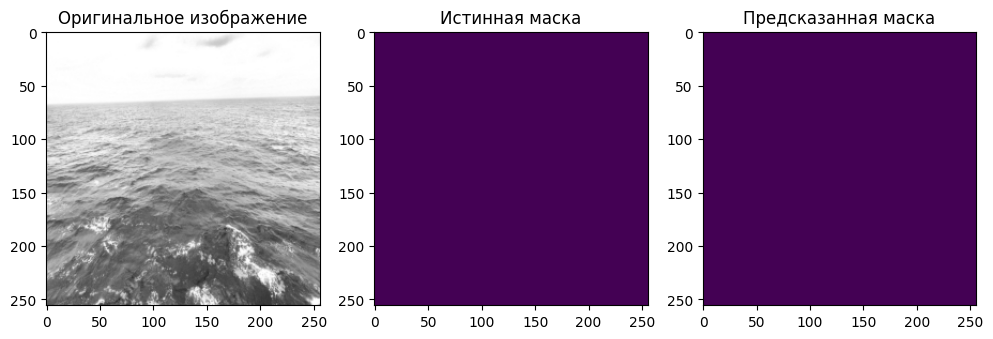

In [14]:
import matplotlib.pyplot as plt

model.eval()
test_image, test_mask = dataset[300]
test_image = test_image.to(device).unsqueeze(0)

with torch.no_grad():
    pred_mask = model(test_image)
    pred_mask = torch.argmax(pred_mask, dim=1).squeeze(0).cpu().numpy()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Оригинальное изображение")
plt.imshow(test_image.cpu().squeeze(0).permute(1, 2, 0))

plt.subplot(1, 3, 2)
plt.title("Истинная маска")
plt.imshow(test_mask)

plt.subplot(1, 3, 3)
plt.title("Предсказанная маска")
plt.imshow(pred_mask)
plt.show()

In [13]:
def find_valid_index(dataset): 
    for idx in range(len(dataset)): 
        _, mask = dataset[idx]  # Получаем маску 
        unique_values = torch.unique(mask)  # Уникальные значения маски 
        if len(unique_values) > 1:  # Если маска содержит больше одного значения 
            return idx
        return 'nothing'

find_valid_index(dataset)

'nothing'

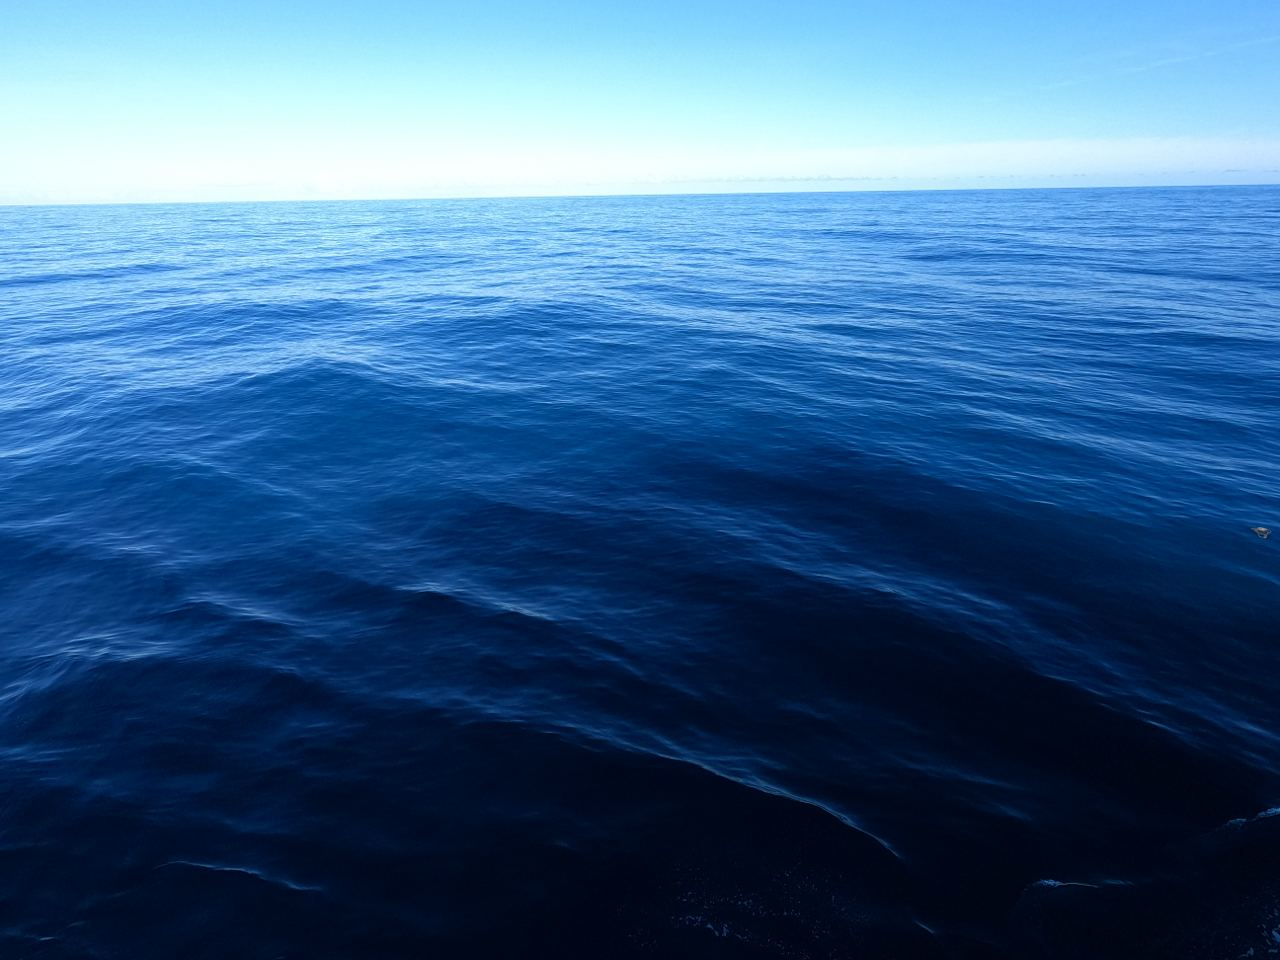

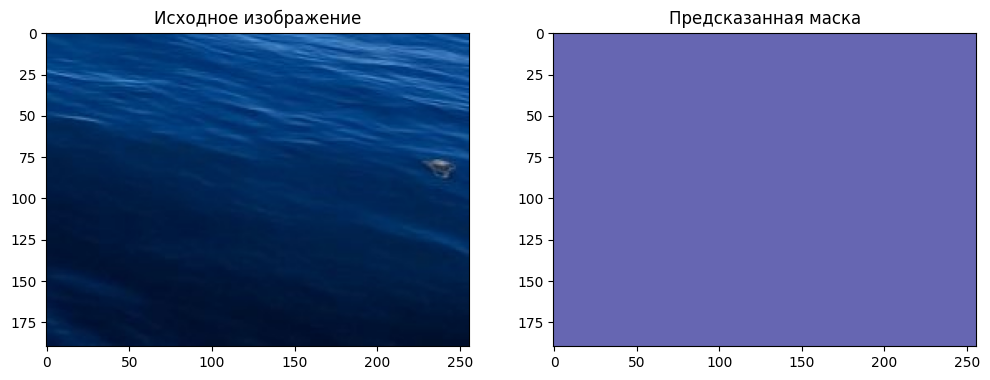

In [17]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, ToTensor, Resize

def visualize_model_on_image(model, image_path, device, target_size=(256, 256)):
    """
    Загрузить изображение, передать его в модель и отобразить предсказанную маску.
    
    model: обученная модель (например, U-Net)
    image_path: путь к локальному изображению
    device: устройство (CPU или GPU)
    target_size: размер входного изображения для модели
    """
    transform = Compose([
        Resize(target_size),
        ToTensor()
    ])
    
    image = Image.open(image_path).convert("RGB")
    original_size = image.size
    transformed_image = transform(image).unsqueeze(0).to(device)  # Добавляем batch dimension
    
    model.eval()
    with torch.no_grad():
        output = model(transformed_image)  # [B, num_classes, H, W]
        predicted_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()  # [H, W]
    
    predicted_mask_resized = np.array(Image.fromarray(predicted_mask.astype(np.uint8)).resize(original_size, Image.NEAREST))
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Исходное изображение")
    plt.imshow(image)
    
    plt.subplot(1, 2, 2)
    plt.title("Предсказанная маска")
    plt.imshow(predicted_mask_resized, cmap="jet", alpha=0.6)
    
    plt.show()

image_path = "/kaggle/input/gfdfcg/photo_2024-10-23_13-38-31.jpg"  
visualize_model_on_image(model, image_path, device)